In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import uuid
from sentence_transformers import SentenceTransformer
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# twitch = pd.read_csv('data/dataset/twitch_ideas.csv')
# twitch = twitch.drop(columns=['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'])
# twitch.dropna(subset=['Description'], inplace=True)
# print('Dataframe Shape:', twitch.shape)
# twitch['uuid'] = [uuid.uuid4() for _ in range(len(twitch.index))]
# twitch.head()
twitch = pd.read_csv('data/dataset/twitch_ideas.csv', index_col=0)
twitch.head()


,Author,Title,Description,VoteCount,NumComments,Topic,Category,Date,uuid
0,iateyourpie,Keep Moments,Moments is a feature that Twitch released as a...,4191,453,Stream Chat,Chat,31-Aug-23,9ec26a3c-f58d-448a-a6d9-81374a196099
1,iAndy88,Verified status for everyone and /verifiedonly...,I would appreciate a very helpful feature for ...,4049,246,Feature Request,Chat,12-Jan-21,fe4ffccb-41a7-43aa-8315-5d7ad1359525
2,GohgoDude,Channel Points Leaderboard,Provide two leaderboards for channels that hav...,1883,21,Leaderboards,Chat,8-Jan-20,3a09216b-de6c-45b0-92f8-c52df11f66c2
3,Victor_sueca,/spoiler command,Users sending a spoiler could use this command...,817,15,Commands,Chat,17-Dec-16,d148a570-1f71-42e3-9680-1534e2af516d
4,xSwagzy,Birthday Badge,It would be nice to have a birthday badge for ...,597,11,Feature Request,Chat,27-Nov-19,c6c20c0b-d61a-4d42-91fc-adf5049426d3


In [3]:
model_name = 'paraphrase-MiniLM-L6-v2'
device = 'cuda'
model = SentenceTransformer(model_name, device=device)

def embed_text(text):
    embeddings = model.encode(text, convert_to_tensor=True)
    return embeddings

In [4]:
embeddings_dir = 'data/BERT_embeddings'

In [19]:
embeddings_list = []

# c = 0
for _, row in tqdm(twitch.iterrows()):
    uuid = row['uuid']
    description = row['Description']
    embedding = embed_text(description)
    embedding = embedding.cpu().numpy()
    embeddings_list.append(embedding)
    np.save(os.path.join(embeddings_dir, f'{uuid}.npy'), embedding)
    # c += 1
    # if c == 5:
    #     break

embeddings_array = np.array(embeddings_list)
print(embeddings_array.shape)

12881it [00:53, 239.77it/s]

(12881, 384)


In [5]:
def load_embedding(uuid):
    if str(uuid) + '.npy' in os.listdir(embeddings_dir):
        embedding_path = os.path.join(embeddings_dir, f'{uuid}.npy')
        return np.load(embedding_path)

twitch['BERT_embedding'] = twitch['uuid'].apply(load_embedding)
twitch.head()

,Author,Title,Description,VoteCount,NumComments,Topic,Category,Date,uuid,BERT_embedding
0,iateyourpie,Keep Moments,Moments is a feature that Twitch released as a...,4191,453,Stream Chat,Chat,31-Aug-23,9ec26a3c-f58d-448a-a6d9-81374a196099,"[-0.23314425, -0.059934393, 0.024125112, -0.37..."
1,iAndy88,Verified status for everyone and /verifiedonly...,I would appreciate a very helpful feature for ...,4049,246,Feature Request,Chat,12-Jan-21,fe4ffccb-41a7-43aa-8315-5d7ad1359525,"[-0.32630354, -0.1644918, -0.0832853, -0.32016..."
2,GohgoDude,Channel Points Leaderboard,Provide two leaderboards for channels that hav...,1883,21,Leaderboards,Chat,8-Jan-20,3a09216b-de6c-45b0-92f8-c52df11f66c2,"[0.05259177, -0.20050193, -0.18675062, -0.4060..."
3,Victor_sueca,/spoiler command,Users sending a spoiler could use this command...,817,15,Commands,Chat,17-Dec-16,d148a570-1f71-42e3-9680-1534e2af516d,"[-0.38948622, 0.048313674, 0.17290682, -0.2886..."
4,xSwagzy,Birthday Badge,It would be nice to have a birthday badge for ...,597,11,Feature Request,Chat,27-Nov-19,c6c20c0b-d61a-4d42-91fc-adf5049426d3,"[-0.41903082, 0.38184872, -0.036135912, -0.385..."


In [21]:
twitch.to_csv('data/dataset/twitch_ideas_with_BERT_embeddings.csv', index=False)

In [6]:
twitch = pd.read_csv('data/dataset/twitch_ideas_with_BERT_embeddings.csv')
twitch.head()

,Author,Title,Description,VoteCount,NumComments,Topic,Category,Date,uuid,BERT_embedding
0,iateyourpie,Keep Moments,Moments is a feature that Twitch released as a...,4191,453,Stream Chat,Chat,31-Aug-23,9ec26a3c-f58d-448a-a6d9-81374a196099,[-2.33144253e-01 -5.99343926e-02 2.41251122e-...
1,iAndy88,Verified status for everyone and /verifiedonly...,I would appreciate a very helpful feature for ...,4049,246,Feature Request,Chat,12-Jan-21,fe4ffccb-41a7-43aa-8315-5d7ad1359525,[-0.32630354 -0.1644918 -0.0832853 -0.320167...
2,GohgoDude,Channel Points Leaderboard,Provide two leaderboards for channels that hav...,1883,21,Leaderboards,Chat,8-Jan-20,3a09216b-de6c-45b0-92f8-c52df11f66c2,[ 0.05259177 -0.20050193 -0.18675062 -0.406023...
3,Victor_sueca,/spoiler command,Users sending a spoiler could use this command...,817,15,Commands,Chat,17-Dec-16,d148a570-1f71-42e3-9680-1534e2af516d,[-3.89486223e-01 4.83136736e-02 1.72906816e-...
4,xSwagzy,Birthday Badge,It would be nice to have a birthday badge for ...,597,11,Feature Request,Chat,27-Nov-19,c6c20c0b-d61a-4d42-91fc-adf5049426d3,[-4.19030815e-01 3.81848723e-01 -3.61359119e-...


In [7]:
def convert_embedding(string_embedding):
    try:
        # Remove brackets
        string_embedding = string_embedding.strip('[]')
        # Replace newline characters with spaces
        string_embedding = string_embedding.replace('\n', ' ')
        # Split the string by spaces and filter out empty strings
        elements = [elem for elem in string_embedding.split(' ') if elem]
        # Convert elements to floats and create a numpy array
        return np.array([float(elem) for elem in elements])
    except Exception as e:
        # In case of any error, return a zero vector or handle appropriately
        print("Error:", e)  # Optionally print the error for debugging

twitch['BERT_embedding'] = twitch['BERT_embedding'].apply(convert_embedding)
twitch.head()

,Author,Title,Description,VoteCount,NumComments,Topic,Category,Date,uuid,BERT_embedding
0,iateyourpie,Keep Moments,Moments is a feature that Twitch released as a...,4191,453,Stream Chat,Chat,31-Aug-23,9ec26a3c-f58d-448a-a6d9-81374a196099,"[-0.233144253, -0.0599343926, 0.0241251122, -0..."
1,iAndy88,Verified status for everyone and /verifiedonly...,I would appreciate a very helpful feature for ...,4049,246,Feature Request,Chat,12-Jan-21,fe4ffccb-41a7-43aa-8315-5d7ad1359525,"[-0.32630354, -0.1644918, -0.0832853, -0.32016..."
2,GohgoDude,Channel Points Leaderboard,Provide two leaderboards for channels that hav...,1883,21,Leaderboards,Chat,8-Jan-20,3a09216b-de6c-45b0-92f8-c52df11f66c2,"[0.05259177, -0.20050193, -0.18675062, -0.4060..."
3,Victor_sueca,/spoiler command,Users sending a spoiler could use this command...,817,15,Commands,Chat,17-Dec-16,d148a570-1f71-42e3-9680-1534e2af516d,"[-0.389486223, 0.0483136736, 0.172906816, -0.2..."
4,xSwagzy,Birthday Badge,It would be nice to have a birthday badge for ...,597,11,Feature Request,Chat,27-Nov-19,c6c20c0b-d61a-4d42-91fc-adf5049426d3,"[-0.419030815, 0.381848723, -0.0361359119, -0...."


# Prepare train eval test data

In [8]:
min_instances = 10

# Filter categories with at least min_instances instances
category_counts = twitch['Category'].value_counts()
categories_to_keep = category_counts[category_counts >= min_instances].index
filtered_data = twitch[twitch['Category'].isin(categories_to_keep)].copy()

# Encoding the categorical labels
label_encoder = LabelEncoder()
filtered_data['Category_encoded'] = label_encoder.fit_transform(filtered_data['Category'])

# Splitting the data into features (X) and target labels (y)
X = list(filtered_data['BERT_embedding'])
y = filtered_data['Category_encoded'].to_list()

# Splitting the dataset into 80% train, 10% eval, and 10% test with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

#convert to numpy
X_train = np.array(X_train)
X_eval = np.array(X_eval)
X_test = np.array(X_test)

print('Train size:', X_train.shape, 'Train categories:', len(set(y_train)))
print('Eval size:', X_eval.shape, 'Eval categories:', len(set(y_eval)))
print('Test size:', X_test.shape, 'Test categories:', len(set(y_test)))

Train size: (10275, 384) Train categories: 30
Eval size: (1284, 384) Eval categories: 30
Test size: (1285, 384) Test categories: 30


In [9]:
performance_scores = {}

## Logistic Regression

In [10]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Evaluate the model on the evaluation set
y_eval_pred = log_reg.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

# Evaluate the model on the test set
y_test_pred = log_reg.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.56      0.42      0.48        24
                              Ads       0.79      0.79      0.79        66
                    Badges/Emotes       0.67      0.64      0.65        50
                             Bits       0.60      0.27      0.37        11
                     Channel Page       0.39      0.32      0.35        34
                   Channel Points       0.65      0.70      0.67        50
                          Charity       0.55      0.75      0.63         8
                             Chat       0.42      0.47      0.45        83
                     Creator Camp       0.33      0.25      0.29        12
                Creator Dashboard       0.32      0.35      0.34        94
Creator Dashboard: Stream Manager       0.19      0.15      0.17        27
     Creators and Stream Features       0.45      0.42      0.43       

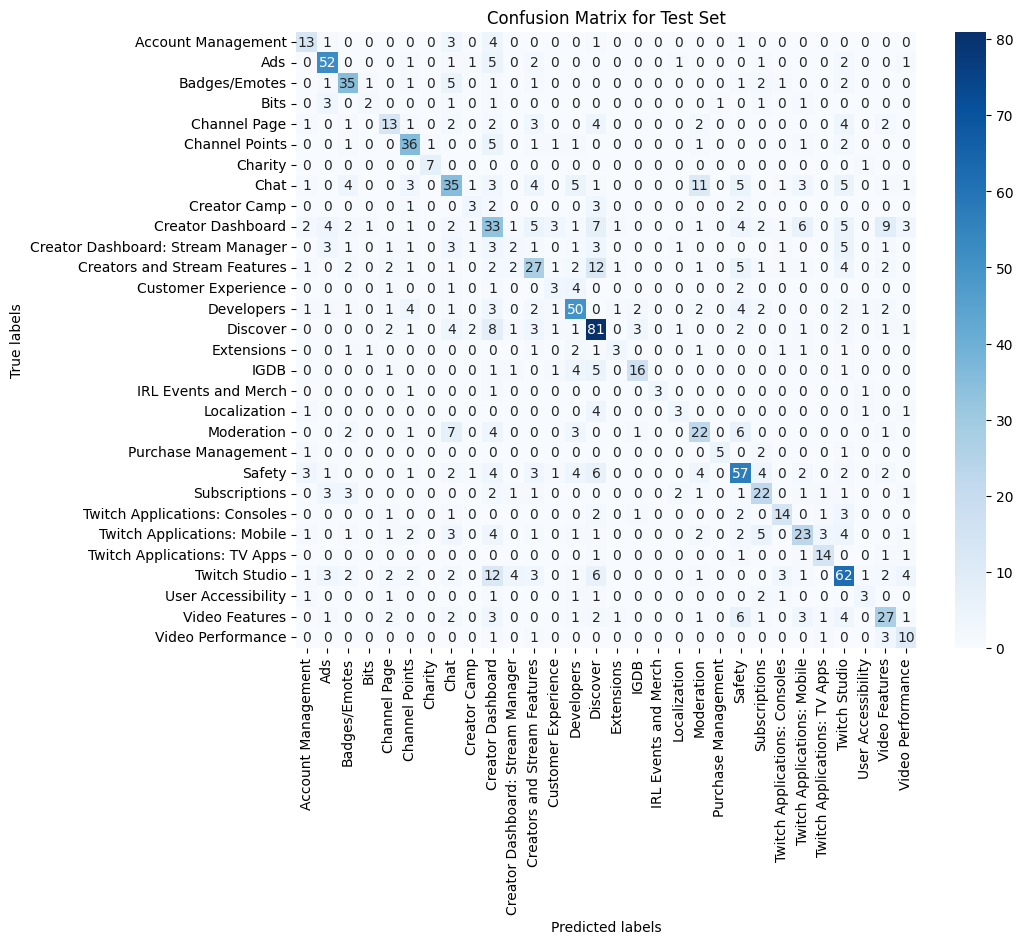

In [14]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [15]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['Logistic Regression'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['Logistic Regression'])

{'Precision': 0.5212229670895538, 'Recall': 0.5260700389105059, 'F1 Score': 0.5197501878375506, 'Support': None, 'Accuracy': 0.5260700389105059}


In [16]:
#save the model inside the models folder
import pickle
pickle.dump(log_reg, open('models/log_reg_classification_BERT.pkl', 'wb'))
print('Model log_reg saved successfully!')

Model log_reg saved successfully!


## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_eval_pred = knn.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = knn.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.30      0.54      0.39        24
                              Ads       0.53      0.94      0.67        66
                    Badges/Emotes       0.55      0.72      0.62        50
                             Bits       0.43      0.27      0.33        11
                     Channel Page       0.26      0.53      0.35        34
                   Channel Points       0.47      0.62      0.53        50
                          Charity       0.55      0.75      0.63         8
                             Chat       0.38      0.49      0.43        83
                     Creator Camp       0.23      0.25      0.24        12
                Creator Dashboard       0.31      0.28      0.29        94
Creator Dashboard: Stream Manager       0.10      0.07      0.08        27
     Creators and Stream Features       0.43      0.38      0.40       

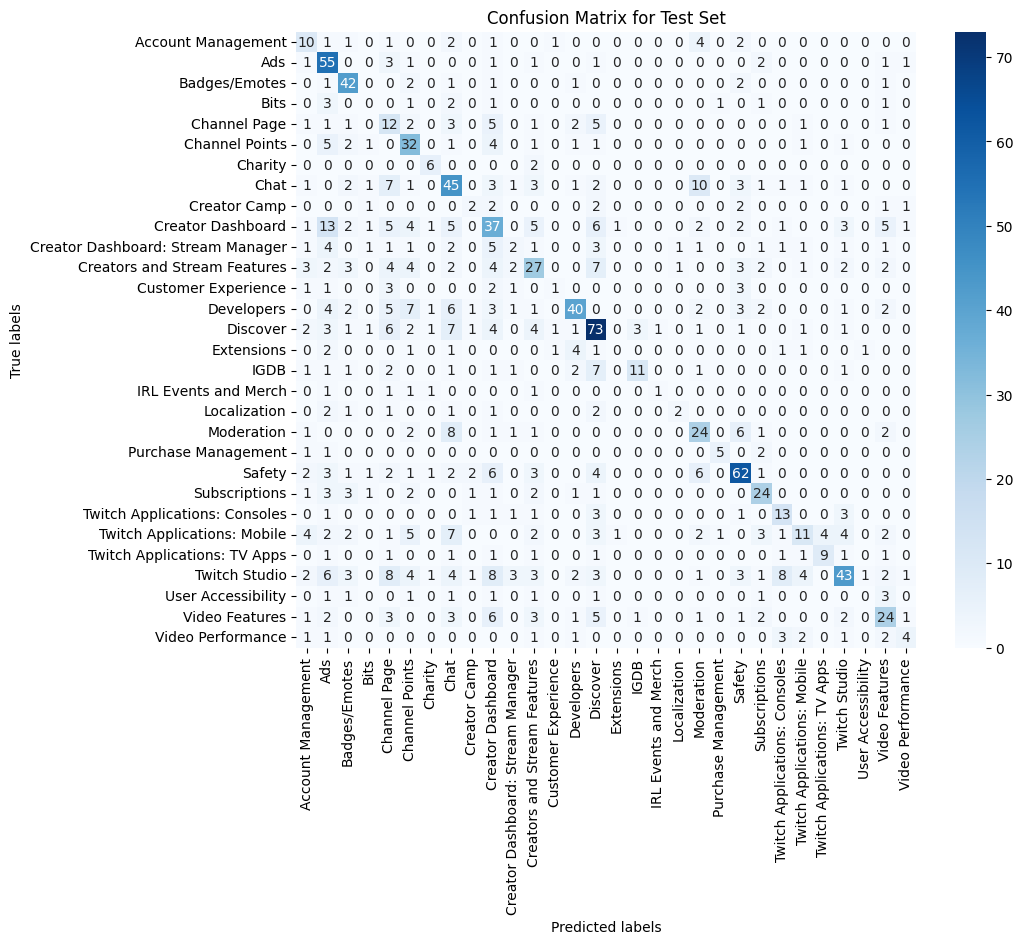

In [18]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [19]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['KNN'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['KNN'])

{'Precision': 0.4900644956106383, 'Recall': 0.4801556420233463, 'F1 Score': 0.4689893182353398, 'Support': None, 'Accuracy': 0.4801556420233463}


In [20]:
pickle.dump(knn, open('models/knn_classification_BERT.pkl', 'wb'))
print('Model knn saved successfully!')

Model knn saved successfully!


## SVM

In [25]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf') 
svm.fit(X_train, y_train)

y_eval_pred = svm.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = svm.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.50      0.46      0.48        24
                              Ads       0.88      0.86      0.87        66
                    Badges/Emotes       0.72      0.72      0.72        50
                             Bits       0.60      0.27      0.37        11
                     Channel Page       0.60      0.26      0.37        34
                   Channel Points       0.73      0.76      0.75        50
                          Charity       0.67      0.75      0.71         8
                             Chat       0.45      0.57      0.50        83
                     Creator Camp       1.00      0.17      0.29        12
                Creator Dashboard       0.30      0.39      0.34        94
Creator Dashboard: Stream Manager       0.20      0.04      0.06        27
     Creators and Stream Features       0.44      0.42      0.43       

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Test Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.58      0.48      0.52        23
                              Ads       0.82      0.75      0.78        67
                    Badges/Emotes       0.64      0.76      0.70        51
                             Bits       0.43      0.30      0.35        10
                     Channel Page       0.52      0.37      0.43        35
                   Channel Points       0.79      0.66      0.72        50
                          Charity       0.70      0.88      0.78         8
                             Chat       0.52      0.55      0.53        84
                     Creator Camp       0.75      0.27      0.40        11
                Creator Dashboard       0.31      0.52      0.39        95
Creator Dashboard: Stream Manager       0.75      0.11      0.19        28
     Creators and Stream Features       0.48      0.42      0.45        69
  

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

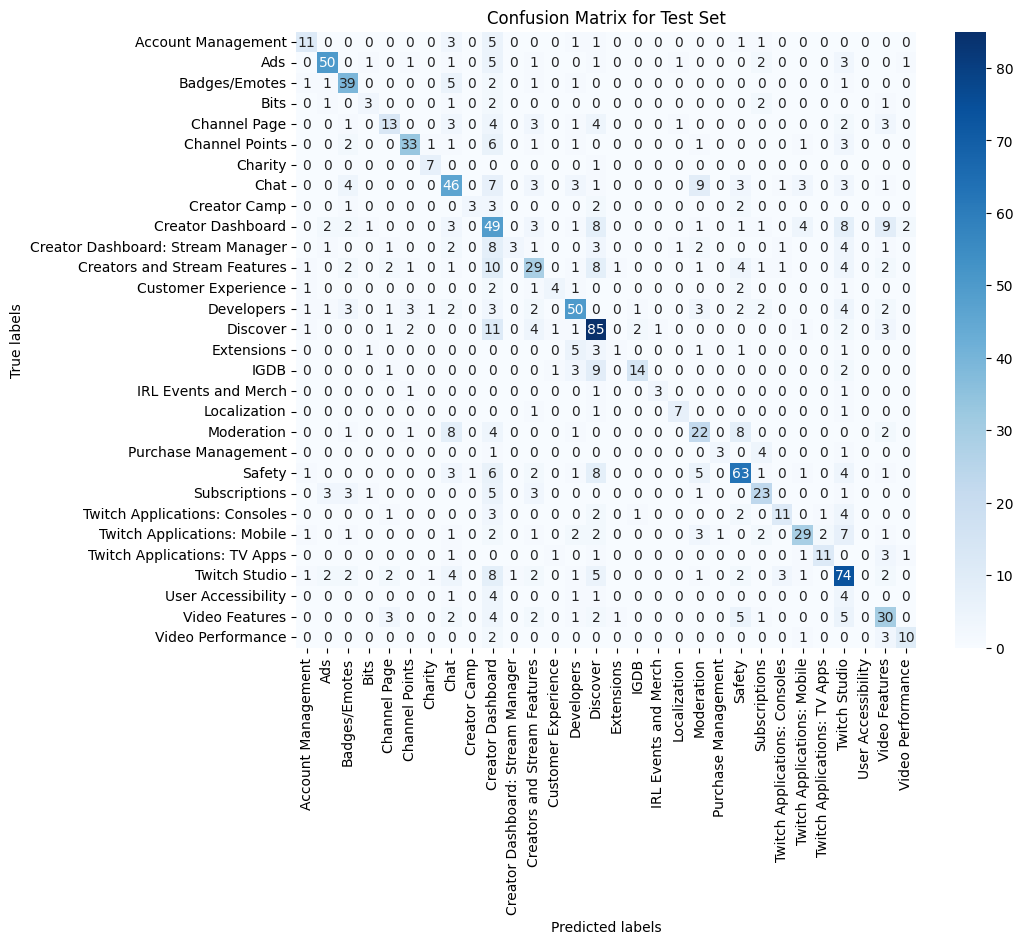

In [26]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [27]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['SVM'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['SVM'])

{'Precision': 0.5832871647339363, 'Recall': 0.5649805447470817, 'F1 Score': 0.5593058663558276, 'Support': None, 'Accuracy': 0.5649805447470817}


/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
pickle.dump(svm, open('models/svm_classification_BERT.pkl', 'wb'))
print('Model svm saved successfully!')

Model svm saved successfully!


## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_eval_pred = dt.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = dt.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.04      0.04      0.04        24
                              Ads       0.40      0.45      0.43        66
                    Badges/Emotes       0.41      0.36      0.38        50
                             Bits       0.00      0.00      0.00        11
                     Channel Page       0.17      0.18      0.17        34
                   Channel Points       0.25      0.26      0.25        50
                          Charity       0.00      0.00      0.00         8
                             Chat       0.17      0.18      0.18        83
                     Creator Camp       0.00      0.00      0.00        12
                Creator Dashboard       0.09      0.10      0.09        94
Creator Dashboard: Stream Manager       0.03      0.04      0.03        27
     Creators and Stream Features       0.13      0.12      0.12       

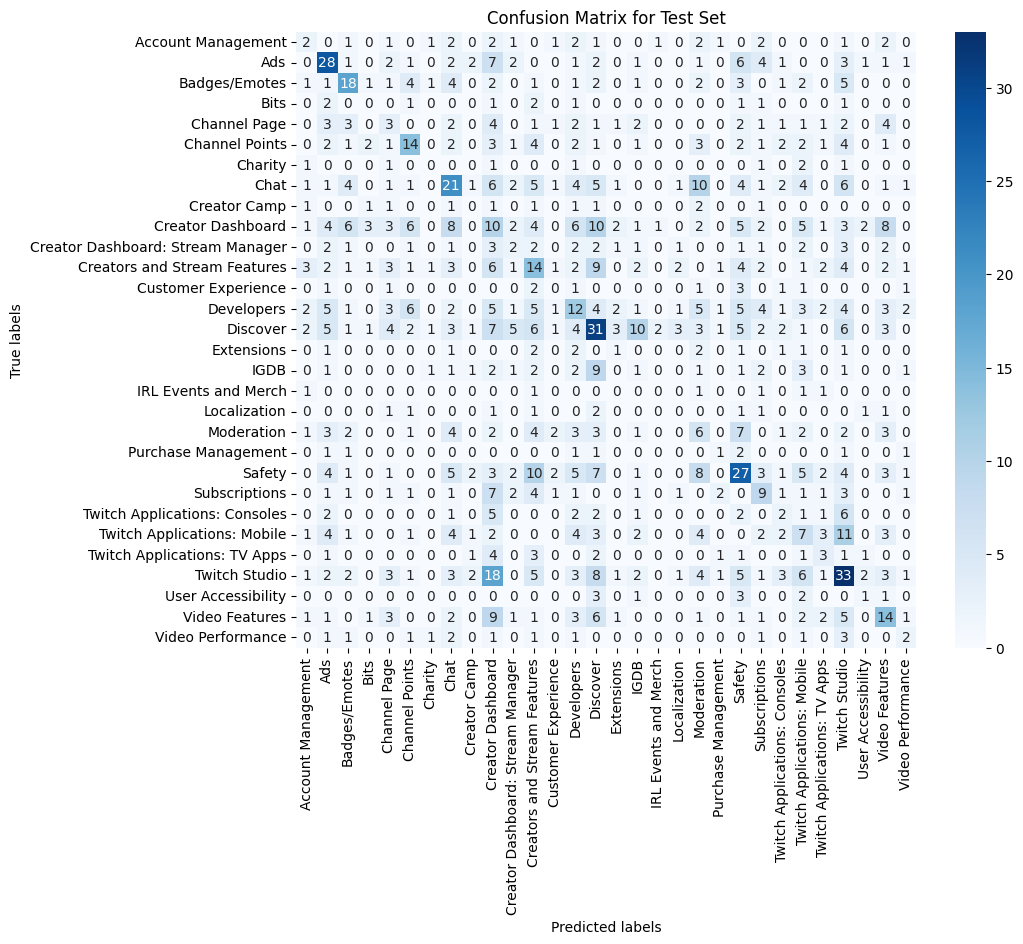

In [30]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [31]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['Decision Tree'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['Decision Tree'])

{'Precision': 0.20498860103267572, 'Recall': 0.20389105058365758, 'F1 Score': 0.20384194296218924, 'Support': None, 'Accuracy': 0.20389105058365758}


In [32]:
pickle.dump(dt, open('models/dt_classification_BERT.pkl', 'wb'))    
print('Model dt saved successfully!')

Model dt saved successfully!


## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_eval_pred = rf.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = rf.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       1.00      0.08      0.15        24
                              Ads       0.71      0.83      0.76        66
                    Badges/Emotes       0.68      0.68      0.68        50
                             Bits       0.00      0.00      0.00        11
                     Channel Page       0.50      0.03      0.06        34
                   Channel Points       0.64      0.54      0.59        50
                          Charity       1.00      0.12      0.22         8
                             Chat       0.38      0.57      0.45        83
                     Creator Camp       0.00      0.00      0.00        12
                Creator Dashboard       0.23      0.33      0.27        94
Creator Dashboard: Stream Manager       0.00      0.00      0.00        27
     Creators and Stream Features       0.24      0.13      0.17       

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

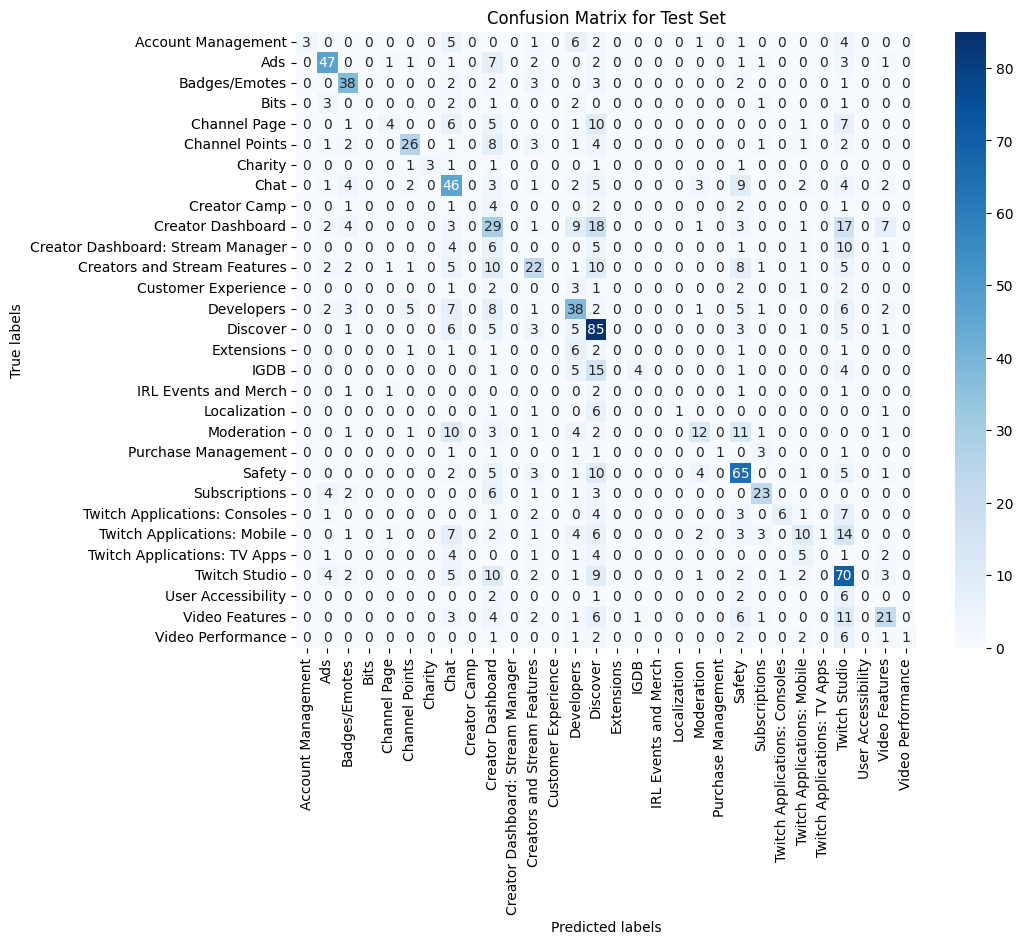

In [34]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [35]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['Random Forest'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['Random Forest'])

{'Precision': 0.4507051879233027, 'Recall': 0.43190661478599224, 'F1 Score': 0.39684756176722835, 'Support': None, 'Accuracy': 0.43190661478599224}


/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
pickle.dump(rf, open('models/rf_classification_BERT.pkl', 'wb'))
print('Model rf saved successfully!')

Model rf saved successfully!


## XGBoost

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_eval_pred = xgb.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = xgb.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.38      0.33      0.36        24
                              Ads       0.83      0.83      0.83        66
                    Badges/Emotes       0.66      0.70      0.68        50
                             Bits       0.67      0.18      0.29        11
                     Channel Page       0.53      0.26      0.35        34
                   Channel Points       0.63      0.64      0.63        50
                          Charity       0.50      0.50      0.50         8
                             Chat       0.47      0.54      0.50        83
                     Creator Camp       0.67      0.17      0.27        12
                Creator Dashboard       0.25      0.32      0.28        94
Creator Dashboard: Stream Manager       0.08      0.04      0.05        27
     Creators and Stream Features       0.38      0.38      0.38       

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

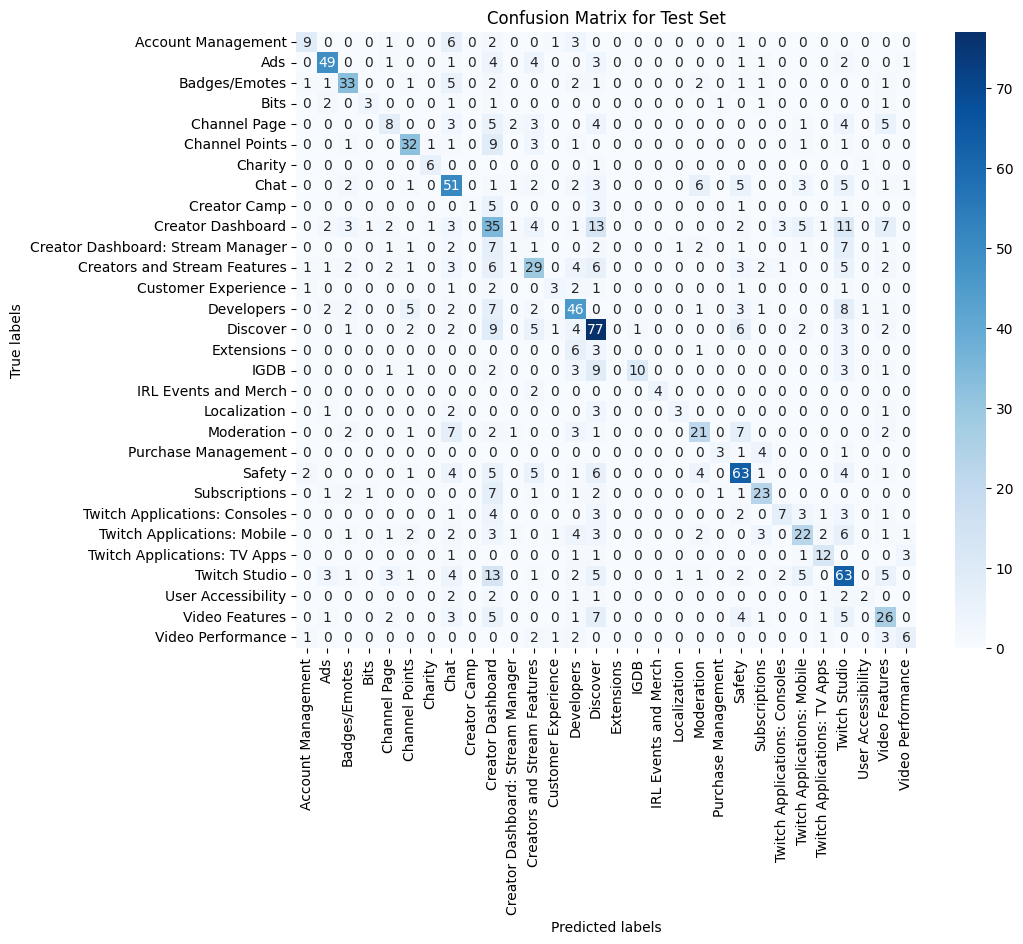

In [38]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [39]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['XGBoost'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['XGBoost'])

{'Precision': 0.5153851477663236, 'Recall': 0.5042801556420233, 'F1 Score': 0.49544182779057866, 'Support': None, 'Accuracy': 0.5042801556420233}


/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
pickle.dump(xgb, open('models/xgb_classification_BERT.pkl', 'wb'))
print('Model xgb saved successfully!')

Model xgb saved successfully!


## LightGBM

In [41]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)

y_eval_pred = lgbm.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = lgbm.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 10275, number of used features: 384
[LightGBM] [Info] Start training from score -3.990445
[LightGBM] [Info] Start training from score -2.964592
[LightGBM] [Info] Start training from score -3.231116
[LightGBM] [Info] Start training from score -4.830750
[LightGBM] [Info] Start training from score -3.624341
[LightGBM] [Info] Start training from score -3.241017
[LightGBM] [Info] Start training from score -5.078586
[LightGBM] [Info] Start training from score -2.734679
[LightGBM] [Info] Start training from score -4.715680
[LightGBM] [Info] Start training from score -2.612077
[LightGBM] [Info] Start training from score -3.834792
[LightGBM] [Info] Start training from score -2.922111
[LightGBM] [Info] Start training from score -4.673121
[LightG

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

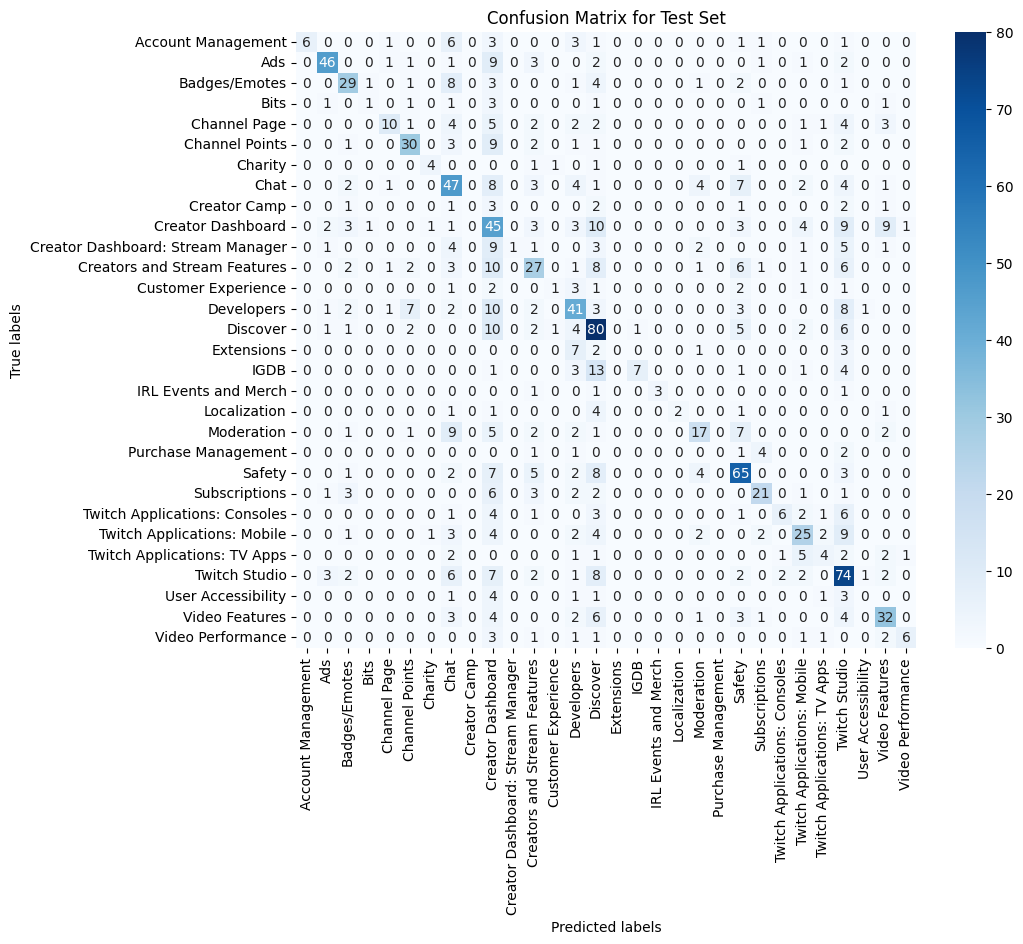

In [42]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [43]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['LightGBM'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['LightGBM'])

{'Precision': 0.5292026873668103, 'Recall': 0.490272373540856, 'F1 Score': 0.47446941091496714, 'Support': None, 'Accuracy': 0.490272373540856}


/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
pickle.dump(lgbm, open('models/lgbm_classification_BERT.pkl', 'wb'))
print('Model lgbm saved successfully!')

Model lgbm saved successfully!


### Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_eval_pred = gnb.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = gnb.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.41      0.46      0.43        24
                              Ads       0.92      0.73      0.81        66
                    Badges/Emotes       0.67      0.66      0.67        50
                             Bits       0.50      0.18      0.27        11
                     Channel Page       0.30      0.35      0.32        34
                   Channel Points       0.61      0.46      0.52        50
                          Charity       0.55      0.75      0.63         8
                             Chat       0.51      0.40      0.45        83
                     Creator Camp       0.07      0.42      0.12        12
                Creator Dashboard       0.33      0.04      0.08        94
Creator Dashboard: Stream Manager       0.07      0.07      0.07        27
     Creators and Stream Features       0.41      0.39      0.40       

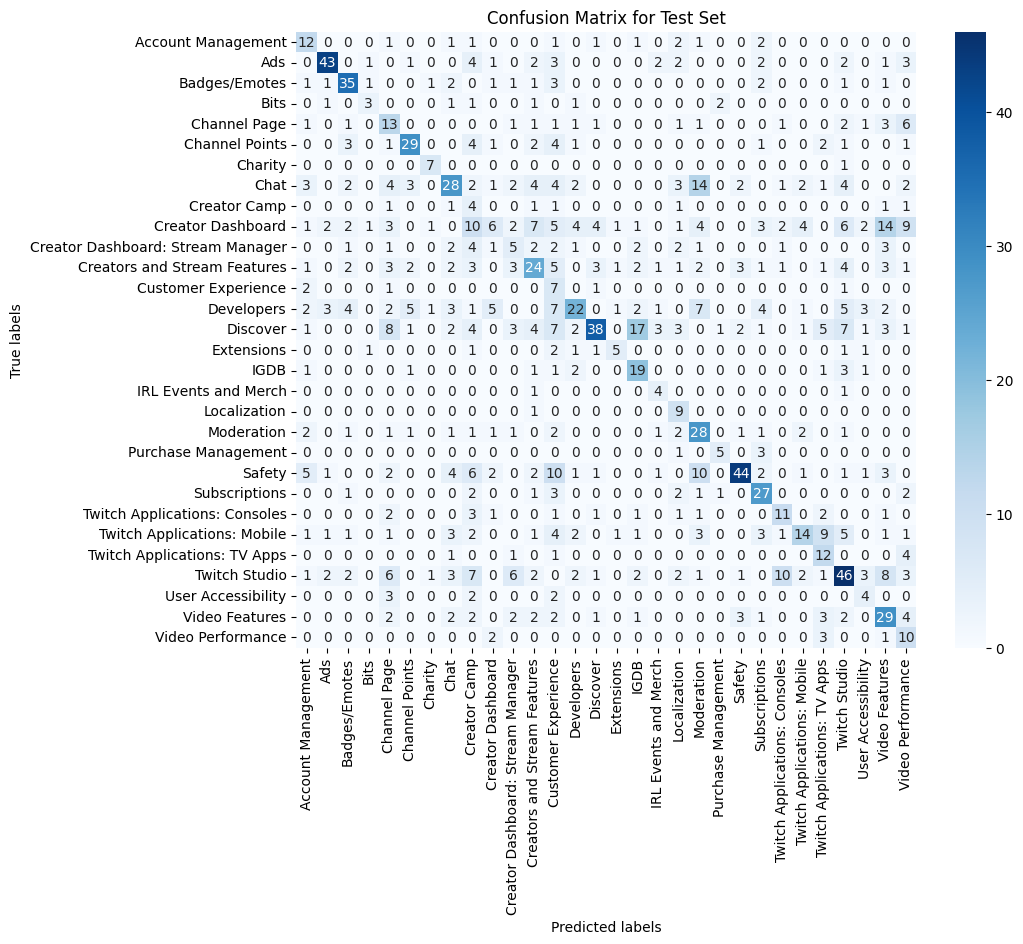

In [46]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [47]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['Naive Bayes'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['Naive Bayes'])

{'Precision': 0.49973083905270826, 'Recall': 0.422568093385214, 'F1 Score': 0.4301196791529146, 'Support': None, 'Accuracy': 0.422568093385214}


In [48]:
pickle.dump(gnb, open('models/gnb_classification_BERT.pkl', 'wb'))
print('Model gnb saved successfully!')

Model gnb saved successfully!


## AdaBoost

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

y_eval_pred = ada.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = ada.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.00      0.00      0.00        24
                              Ads       0.33      0.17      0.22        66
                    Badges/Emotes       0.24      0.40      0.30        50
                             Bits       0.00      0.00      0.00        11
                     Channel Page       0.00      0.00      0.00        34
                   Channel Points       0.12      0.10      0.11        50
                          Charity       0.08      0.38      0.13         8
                             Chat       0.10      0.16      0.12        83
                     Creator Camp       0.00      0.00      0.00        12
                Creator Dashboard       0.17      0.07      0.10        94
Creator Dashboard: Stream Manager       0.00      0.00      0.00        27
     Creators and Stream Features       0.14      0.06      0.08       

/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

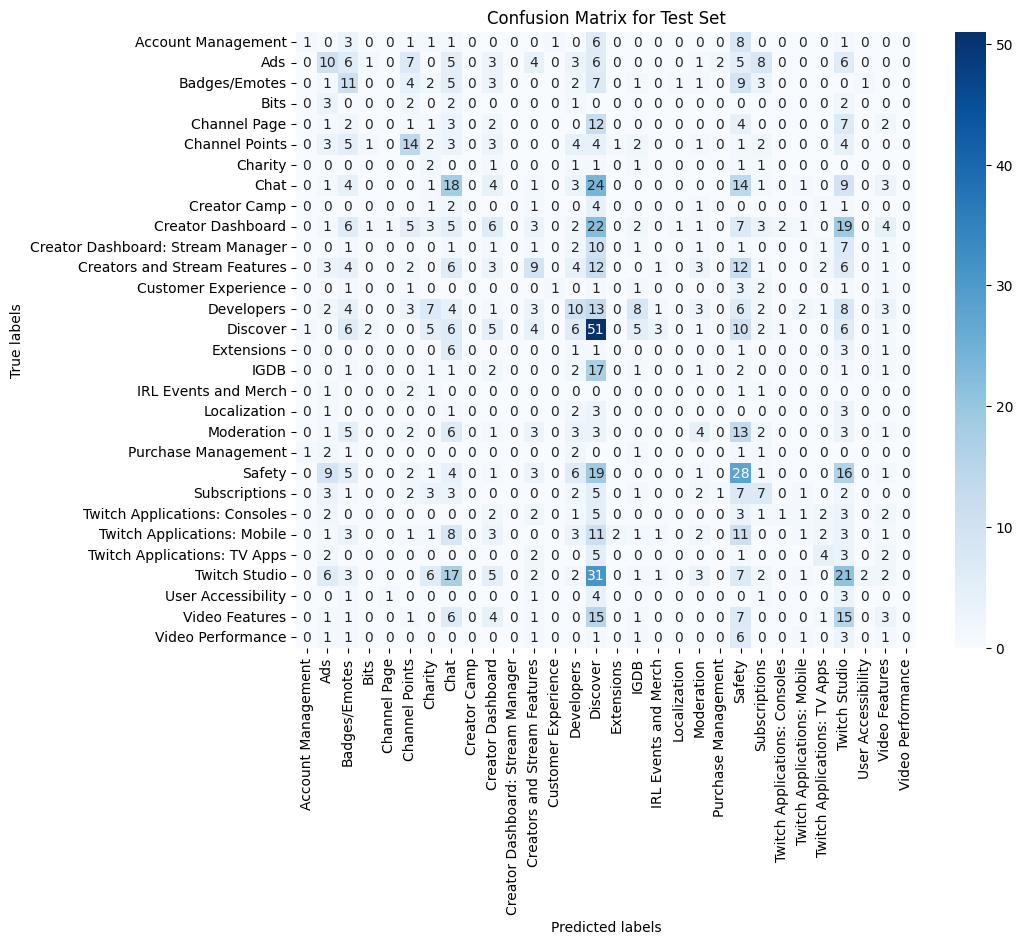

In [52]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [53]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['AdaBoost'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['AdaBoost'])

{'Precision': 0.14805169133053242, 'Recall': 0.15797665369649805, 'F1 Score': 0.13667898613928037, 'Support': None, 'Accuracy': 0.15797665369649805}


/home/admin/VS Code Projects/TwitchSight/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
pickle.dump(ada, open('models/ada_classification_BERT.pkl', 'wb'))
print('Model ada saved successfully!')

Model ada saved successfully!


## MLP

In [55]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)

y_eval_pred = mlp.predict(X_eval)
print("Evaluation Set Performance:")
print(classification_report(y_eval, y_eval_pred, target_names=label_encoder.classes_))

y_test_pred = mlp.predict(X_test)
print("Test Set Performance:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.31      0.21      0.25        24
                              Ads       0.69      0.73      0.71        66
                    Badges/Emotes       0.63      0.62      0.63        50
                             Bits       0.29      0.18      0.22        11
                     Channel Page       0.30      0.38      0.33        34
                   Channel Points       0.55      0.60      0.57        50
                          Charity       0.55      0.75      0.63         8
                             Chat       0.40      0.46      0.43        83
                     Creator Camp       0.30      0.25      0.27        12
                Creator Dashboard       0.21      0.20      0.21        94
Creator Dashboard: Stream Manager       0.07      0.11      0.08        27
     Creators and Stream Features       0.33      0.41      0.36       

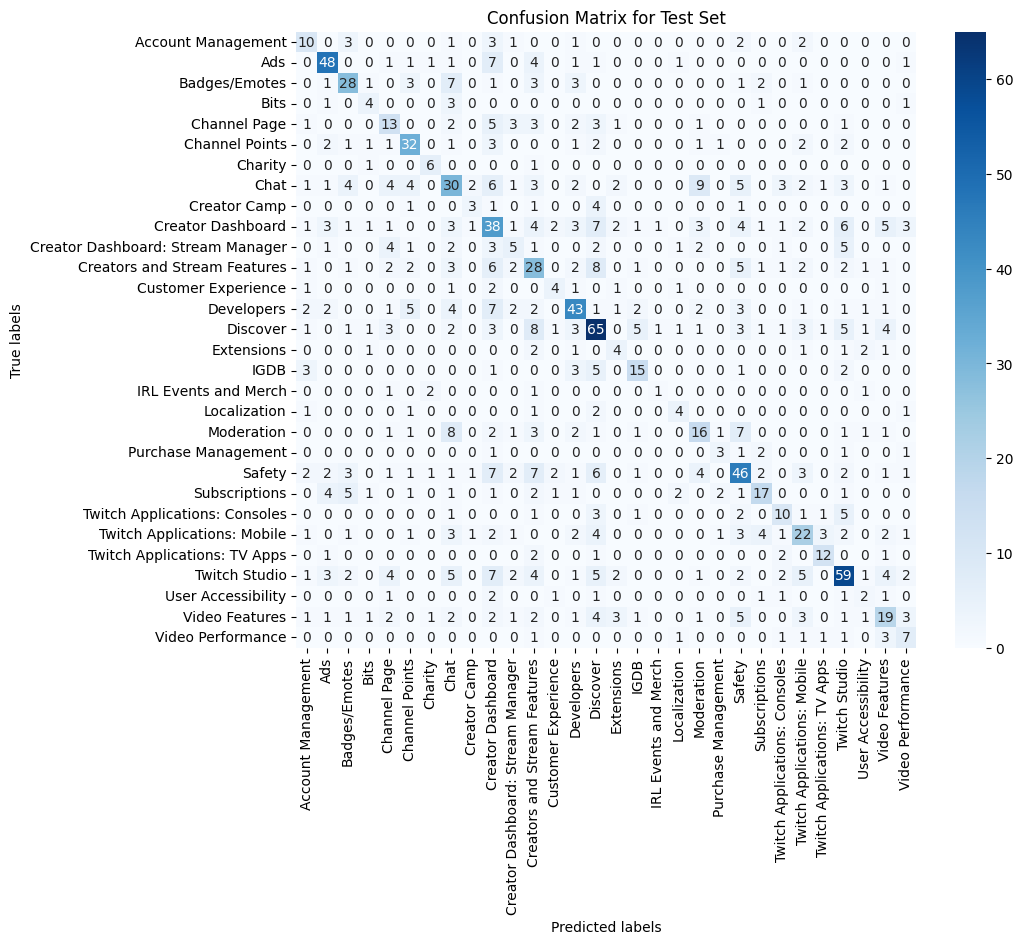

In [56]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [57]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')
accuracy = accuracy_score(y_test, y_test_pred)

performance_scores['MLP'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['MLP'])

{'Precision': 0.46507906812351124, 'Recall': 0.4622568093385214, 'F1 Score': 0.4619214914760599, 'Support': None, 'Accuracy': 0.4622568093385214}


In [58]:
pickle.dump(mlp, open('models/mlp_classification_BERT.pkl', 'wb'))
print('Model mlp saved successfully!')

Model mlp saved successfully!


## Neural Network

In [59]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import StandardScaler

# Converting data to PyTorch Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_eval_tensor = torch.tensor(X_eval, dtype=torch.float32)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Creating datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
eval_dataset = TensorDataset(X_eval_tensor, y_eval_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Creating data loaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = DataLoader(dataset=eval_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [60]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Assuming that the embeddings are of size 768 (like BERT base model)
input_size = X_train.shape[1]
output_size = len(label_encoder.classes_)  # Number of unique categories

model = NeuralNetwork(input_size, output_size)
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=384, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=30, bias=True)
  (relu): ReLU()
)


In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 1.6548
Epoch [2/10], Loss: 1.4006
Epoch [3/10], Loss: 1.1125
Epoch [4/10], Loss: 1.2978
Epoch [5/10], Loss: 2.0338
Epoch [6/10], Loss: 1.3828
Epoch [7/10], Loss: 3.8488
Epoch [8/10], Loss: 1.7753
Epoch [9/10], Loss: 1.0905
Epoch [10/10], Loss: 0.7873


In [64]:
def evaluate_model(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())

    print(classification_report(all_labels, all_preds, target_names=label_encoder.classes_))
    return all_preds, all_labels

print("Evaluation Set Performance:")
all_preds_eval, all_labels_eval = evaluate_model(model, eval_loader)

print("Test Set Performance:")
all_preds_test, all_labels_test = evaluate_model(model, test_loader)

Evaluation Set Performance:
                                   precision    recall  f1-score   support

               Account Management       0.64      0.38      0.47        24
                              Ads       0.79      0.82      0.81        66
                    Badges/Emotes       0.69      0.76      0.72        50
                             Bits       0.67      0.18      0.29        11
                     Channel Page       0.31      0.32      0.31        34
                   Channel Points       0.67      0.74      0.70        50
                          Charity       0.55      0.75      0.63         8
                             Chat       0.51      0.49      0.50        83
                     Creator Camp       0.25      0.08      0.12        12
                Creator Dashboard       0.25      0.44      0.32        94
Creator Dashboard: Stream Manager       0.12      0.04      0.06        27
     Creators and Stream Features       0.55      0.33      0.41       

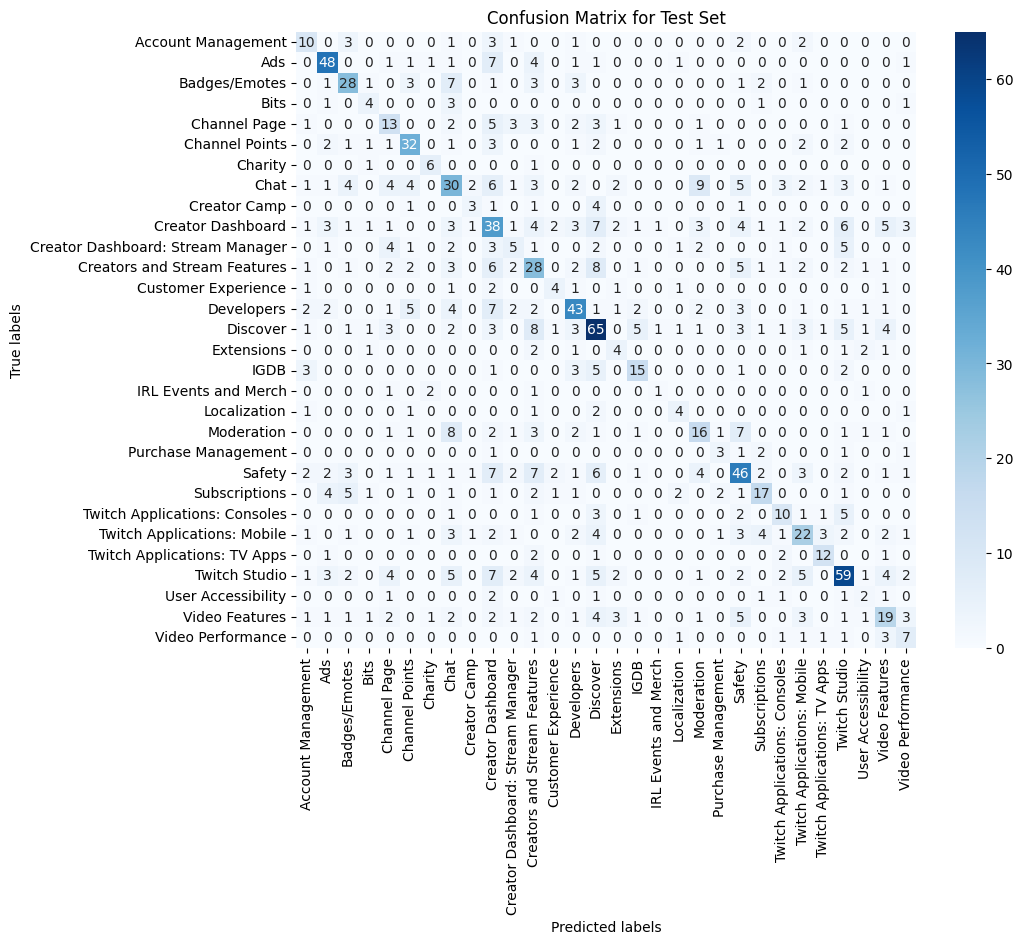

In [65]:
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

In [66]:
precision, recall, f1_score, support = precision_recall_fscore_support(all_labels_test, all_preds_test, average='weighted')
accuracy = accuracy_score(all_labels_test, all_preds_test)

performance_scores['Neural Network'] = {
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'Support': support,
    'Accuracy': accuracy
}
print(performance_scores['Neural Network'])

{'Precision': 0.5523253608700988, 'Recall': 0.5330739299610895, 'F1 Score': 0.529765746262656, 'Support': None, 'Accuracy': 0.5330739299610895}


In [67]:
#save the neural network model
torch.save(model.state_dict(), 'models/neural_network_classification_BERT.pth')
print('Model neural_network saved successfully!')

Model neural_network saved successfully!


In [88]:
import pickle

with open('data/pickles/X_train_tensor_classification_BERT.pickle', 'wb') as f:
    pickle.dump(X_train_tensor, f)

with open('data/pickles/y_train_tensor_classification_BERT.pickle', 'wb') as f:
    pickle.dump(y_train_tensor, f)

with open('data/pickles/X_eval_tensor_classification_BERT.pickle', 'wb') as f:
    pickle.dump(X_eval_tensor, f)

with open('data/pickles/y_eval_tensor_classification_BERT.pickle', 'wb') as f:
    pickle.dump(y_eval_tensor, f)

with open('data/pickles/X_test_tensor_classification_BERT.pickle', 'wb') as f:
    pickle.dump(X_test_tensor, f)

with open('data/pickles/y_test_tensor_classification_BERT.pickle', 'wb') as f:
    pickle.dump(y_test_tensor, f)

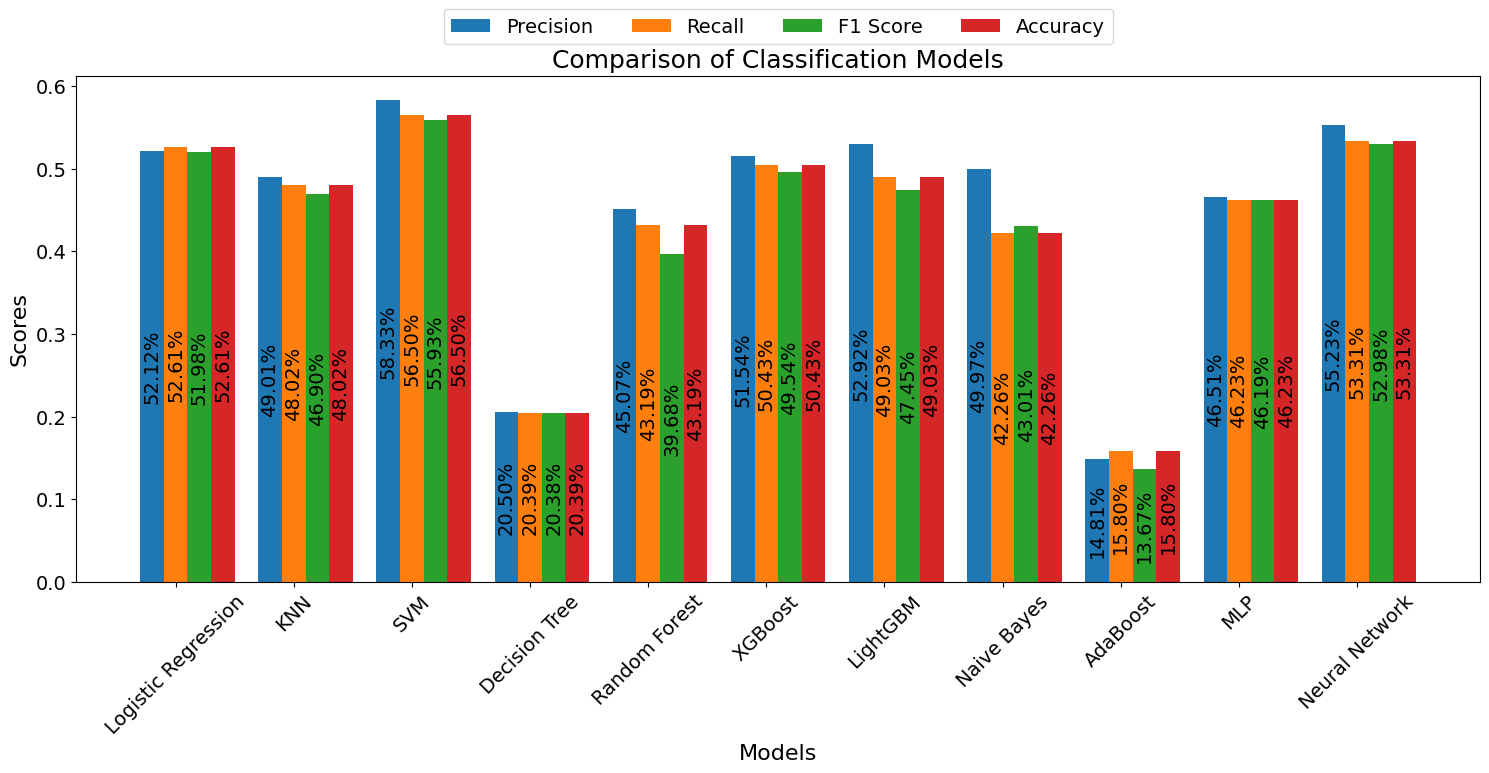

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'performance_scores' is your dictionary with model performance data
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
models = list(performance_scores.keys())
data = {metric: [performance_scores[model][metric] for model in models] for metric in metrics}

# Number of groups and bar width
n_groups = len(models)
bar_width = 0.2
index = np.arange(n_groups)

# Create a bar plot for each metric
plt.figure(figsize=(15, 8))
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, data[metric], bar_width, label=metric)

# Set font size for various plot elements
plt.xlabel('Models', fontsize=16)
plt.ylabel('Scores', fontsize=16)

# Place the legend on top of the plot and make it flat
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(metrics))

# Set the title on top of the legend
plt.title('Comparison of Classification Models', fontsize=18)

# Annotate bars with percentage values vertically inside the bars
for i, metric in enumerate(metrics):
    for j, score in enumerate(data[metric]):
        plt.text(index[j] + i * bar_width, score / 2, f'{score:.2%}', va='center', ha='center', fontsize=14, rotation=90)

# Adjust the font size of tick labels
plt.xticks(index + bar_width, models, rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()